# Machine Learning based Forecasting
In this document three ML algorithm are tested on simulated data.
 1. K-Means Clustering
 2. K-Nearest Neighbours
 3. Neutral Network 

Various **2D** and **3D** scatter plots are plotted for better understanding.
##  Steps of ML
 1. Read Data for file
 2. Split Dataset into training set and testing set
 3. Transform the data if required
 4. Define Model
 5. Train the Model using training set 
 6. Forecast the data using test set
 7. Compare the forecasted value with actual value using confusion matrix
 8. Plot the results

# 1. K-Means Clustering
### Import The Library
All libraries are included  

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

### Read The Dataset

In [2]:
df=pd.read_csv('HeatDemand.csv')
X = df.iloc[:,1:9]
y = df['DH:District Heating Inlet Temperature [C](TimeStep:ON)']
df.head()


,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](TimeStep),Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep),TZ_001:Zone People Occupant Count [](TimeStep:ON),TZ_001:Zone People Sensible Heating Rate [W](TimeStep),TZ_001:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep),DH:District Heating Hot Water Energy [KJ](TimeStep:ON),DH:District Heating Hot Water Rate [KW](TimeStep:ON),DH:District Heating Inlet Temperature [C](TimeStep:ON)
0,01/01 00:15:00,7.2725,0.0,0.0,1.0,80.912482,0.0,500406.3132,556.007015,50
1,01/01 00:30:00,6.0650,0.0,0.0,1.0,79.740535,0.0,474024.5772,526.693975,52
2,01/01 00:45:00,4.8575,0.0,0.0,1.0,78.220023,0.0,365448.8766,406.054307,56
3,01/01 01:00:00,3.6500,0.0,0.0,1.0,77.895519,0.0,276488.1718,307.209080,59
4,01/01 01:15:00,3.8375,0.0,0.0,1.0,77.618478,0.0,224995.4725,249.994969,61


### Split The Dataset

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Evaluate Number Of Clusters
Number of clusters are calculated using the Elbow method

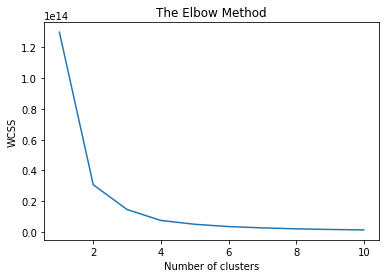

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)

## K-means Clusters 

Cluster of training dataset

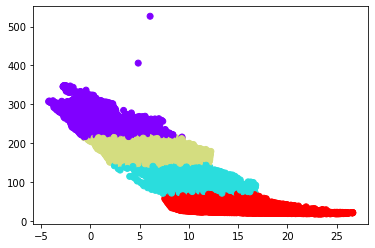

In [6]:
plt.scatter(X_train['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)'], X_train['DH:District Heating Hot Water Rate [KW](TimeStep:ON)'], c = y_kmeans, cmap='rainbow')

In [7]:
y_k = kmeans.fit_predict(X_test)

### Predicted Clusters


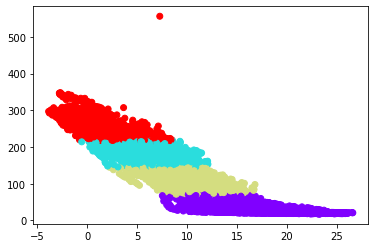

In [8]:
plt.scatter(X_test['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)'], X_test['DH:District Heating Hot Water Rate [KW](TimeStep:ON)'], c = y_k, cmap='rainbow')

### Problem K-means
Evaluation of accuracy is very difficult of K-Means method
# 2. K-Nearest Neighbours

In [9]:

knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

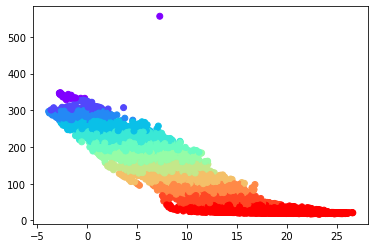

In [10]:
y_pred = knn.predict(X_test)
plt.scatter(X_test['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)'], X_test['DH:District Heating Hot Water Rate [KW](TimeStep:ON)'], c = y_pred, cmap='rainbow')

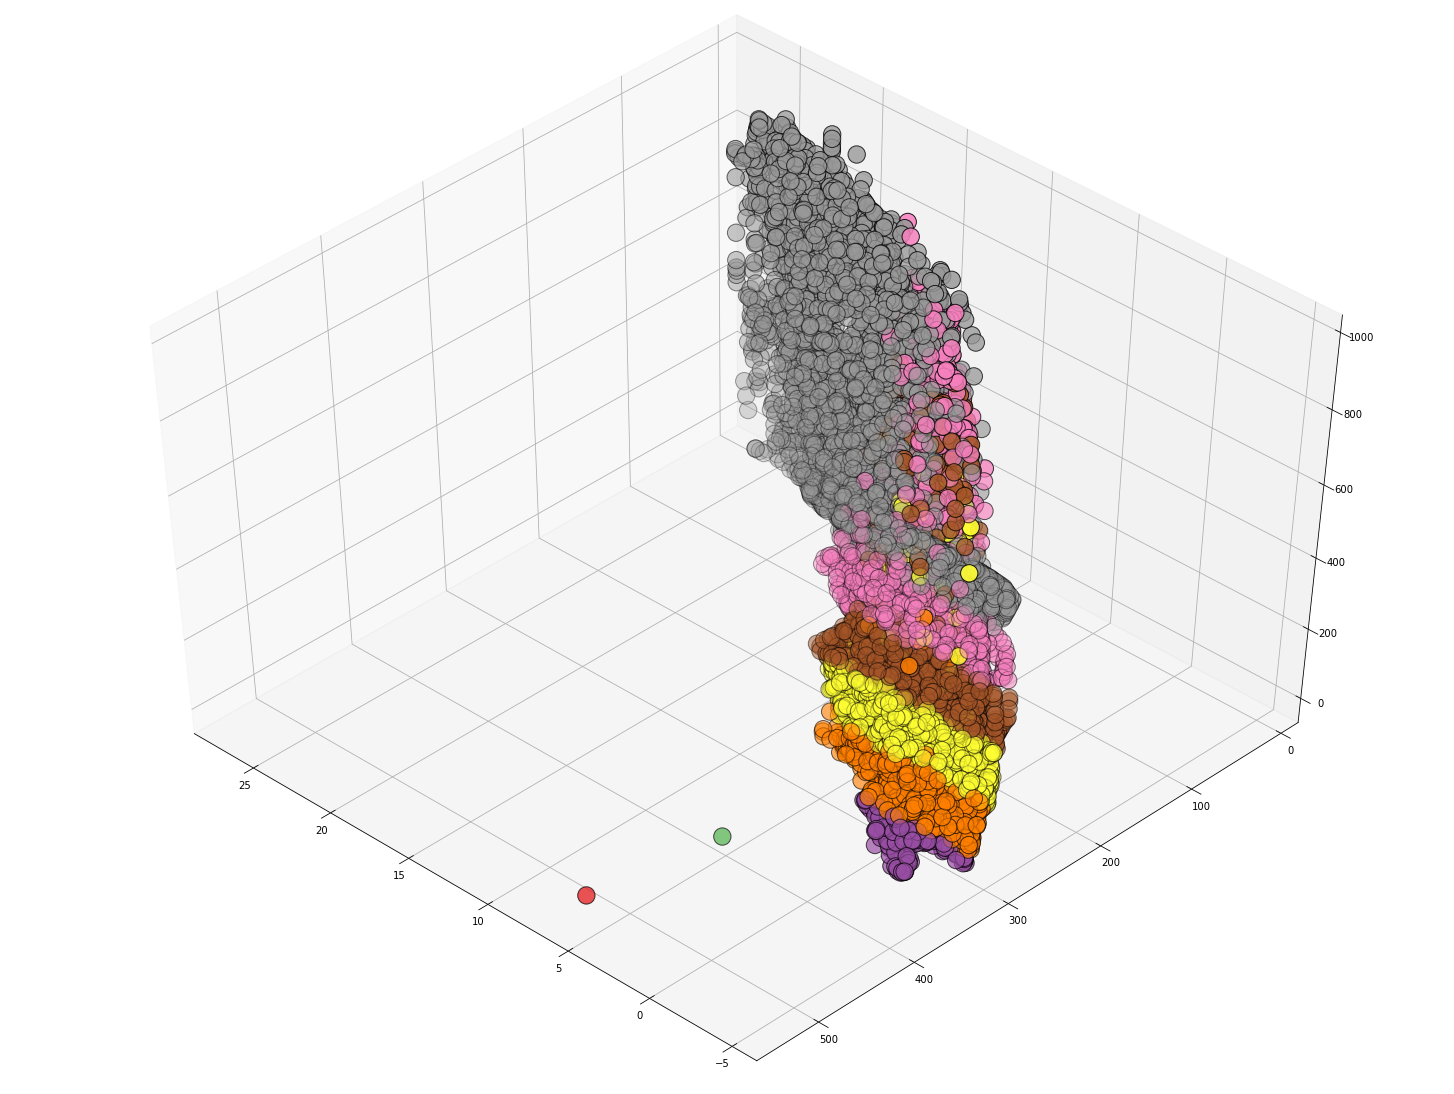

In [11]:

fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X_train['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)'], X_train['DH:District Heating Hot Water Rate [KW](TimeStep:ON)'], X_train['Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep)'], c = y_train , cmap=plt.cm.Set1, edgecolor='k',s=300)


In [12]:

Confusion_Matrix=confusion_matrix(y_test, y_pred)

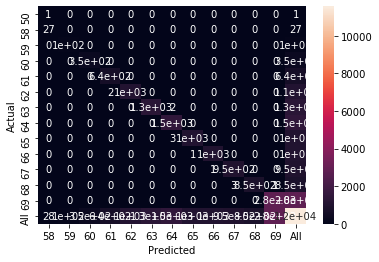

In [13]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)

sns.heatmap(confusion_matrix, annot=True)

In [14]:
confusion_matrix

Predicted,58,59,60,61,62,63,64,65,66,67,68,69,All
Actual,,,,,,,,,,,,,
50,1,0,0,0,0,0,0,0,0,0,0,0,1
58,27,0,0,0,0,0,0,0,0,0,0,0,27
59,0,101,0,0,0,0,0,0,0,0,0,0,101
60,0,0,347,0,0,0,0,0,0,0,0,0,347
61,0,0,0,635,0,0,0,0,0,0,0,0,635
62,0,0,0,2,1049,0,0,0,0,0,0,0,1051
63,0,0,0,0,0,1266,2,0,0,0,0,0,1268
64,0,0,0,0,0,0,1470,0,0,0,0,0,1470
65,0,0,0,0,0,0,3,1032,0,0,0,0,1035


In [15]:
accuracy_score(y_test, y_pred)

0.9987893462469734

# 3. Neutral Network

In [16]:

scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
predictions = mlp.predict(X_test)

In [19]:

accuracy_score(y_test, predictions)

0.9891905914908337